# Bigmart Sales Analysis 
## By Subadarshini Madhanan


### Problem Statement 
This project aims to predict the sales of each product in the bigmart. It involves the usage of Linear Regression, L1 and L2 Regularization, Random Forest Regressor and XG Boost Regressor  

### Loading Packages and Data

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data into the dataframe
df = pd.read_csv("Train.csv", header = 0)
df2 = pd.read_csv("Test.csv", header = 0)

## Hypothesis Generation

- Null hypothesis (H0): The independent variables have no relationship with the dependent variable - Item_Outlet_Sales.

- Alternate hypothesis (Ha) - The independent variables have some relationship with the dependent variable - Item_Outlet_Sales.

- Significance value(_Alpha value_) = 0.05

### Data Structure and content 

In [3]:
# Viewing first five rows of the dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Viewing last five rows of the dataset
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
df2.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [7]:
# Total number of rows and columns in the df dataframe
df.shape

(8523, 12)

In [8]:
# Total number of rows and columns in the df2 dataframe
df2.shape

(5681, 11)

In [9]:
# Viewing information about the df dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
# Viewing information about df2 dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [11]:
# Checking for null values in the df dataframe
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

__Inference__

- The dataframe, df, seems to have null values in the 'Item_Weight' and 'Outlet_Size' column

### Running Extended Data Dictionary

In [12]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

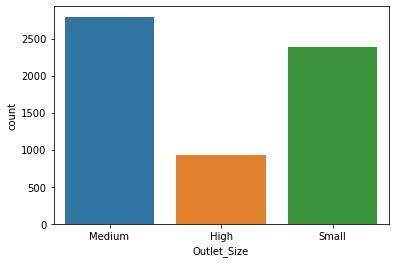

In [13]:
# Plotting a countplot to view the mode value of the Outlet_Size column
sns.countplot(x="Outlet_Size", data = df)

### Missing value Imputation

In [14]:
# Creating a dictionary with missing value column and the value to be replaced with as key-value pair
df.fillna(
{ 'Item_Weight' : df['Item_Weight'].mean(),
  'Outlet_Size' : 'Medium'
},inplace =True)

In [15]:
# Checking for null-values after missing value imputation
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

__Inference__

- The column Item_Weight is numerical so, the missing values of the column has been replaced with its mean. 
- The column Outlet_Size is categorical so, the missing values of the column has been replaced with its mode, which is 'Medium'   and that can viewed from the countplot.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [17]:
# Checking for null values in the df2 dataframe
df2.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [18]:
# Running EDD
df2.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [19]:
# Filling the missing values in the numerical column with its mean and mode value for categorical column
df2.Item_Weight = df2.Item_Weight.fillna(df2.Item_Weight.mean())
mode_fill = df2['Outlet_Size'].mode().values[0]
df2['Outlet_Size'] = df2['Outlet_Size'].replace(np.nan,mode_fill)

In [20]:
# Checking for null values after missing value Imputation
df2.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


### Checking for duplicate values

In [22]:
# Using the duplicated function to check duplicates in the df dataframe
duplicate_values = df.duplicated()
print(duplicate_values.sum())

0


In [23]:
df[duplicate_values]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


__Inference__
- There are no duplicate values in the dataset.

In [24]:
# Checking for duplicates in df2 dataframe
duplicate_values2 = df2.duplicated()
print(duplicate_values2.sum())

0


In [25]:
df2[duplicate_values2]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


__Inference__
- There are no duplicate values in df2 dataframe

### Dimensionality Reduction
The columns 'Item_Identifier','Outlet_Identifier' and 'Outlet_Establishment_Year' are of no use for the prediction so, I have dropped them.

In [26]:
df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis = 1,inplace =True)
df2.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis = 1,inplace = True)

In [27]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [28]:
df2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,Medium,Tier 3,Supermarket Type3


## Univariate Analysis, Bi-variate and multi-variate Analysis

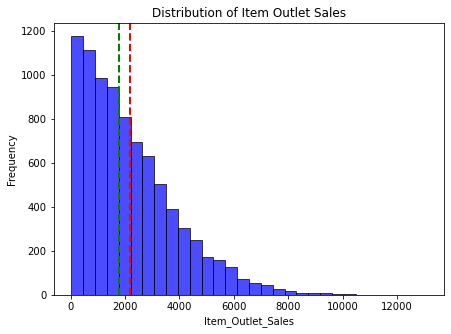

In [29]:
plt.figure(figsize=(7, 5)) # defining the figure size

plt.hist(df.Item_Outlet_Sales, bins=30, edgecolor='k', alpha=0.7, color='blue') # Plotting the histogram

plt.axvline(x=np.mean(df.Item_Outlet_Sales), color='red', linestyle='dashed', linewidth=2) # plotting the mean line
plt.axvline(x=np.median(df.Item_Outlet_Sales), color='green', linestyle='dashed', linewidth=2) # plotting the median line

# defining the axis labels and the title of the graph
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Item Outlet Sales')

plt.show()

__Inference__
- From the histogram plotted, it is clearly visible that the dependent variable, Item_Outlet_Sales is positively skewed.

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

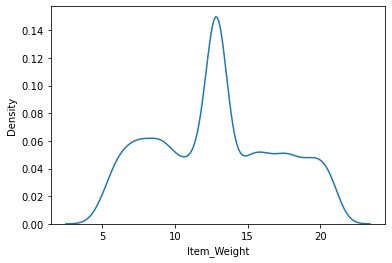

In [30]:
sns.kdeplot(x="Item_Weight", data = df)

<AxesSubplot:xlabel='Item_Weight'>

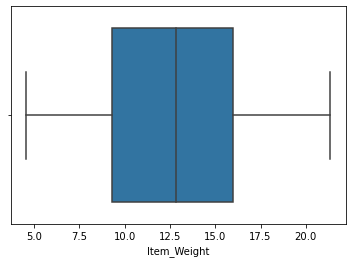

In [31]:
sns.boxplot(x="Item_Weight",data = df)

<AxesSubplot:xlabel='Item_Visibility'>

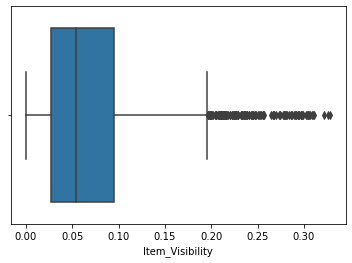

In [32]:
sns.boxplot(x="Item_Visibility",data = df)

__Inference__
- The feature 'Item_Visibility' seems to have outliers so, I am going to perform median imputation where any values 3 times higher than the median will be assigned the median value of the feature.

### Missing value Imputation

In [33]:
# Checking if the value is higher than the median, if yes, it will be imputed with the median value 
median_value = df['Item_Visibility'].median()
df['Item_Visibility'] = df['Item_Visibility'].apply(lambda x: median_value if x > 3 * median_value else x)

<AxesSubplot:xlabel='Item_Visibility'>

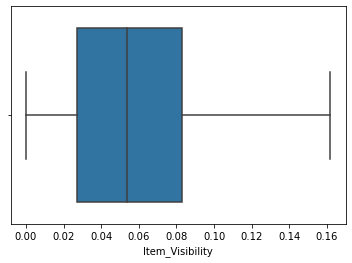

In [34]:
# Checking for outliers after the outlier treatment
sns.boxplot(x="Item_Visibility",data = df)

__Inference__
- From the boxplot, it is visible that the outliers have been treated.

<AxesSubplot:xlabel='Item_MRP'>

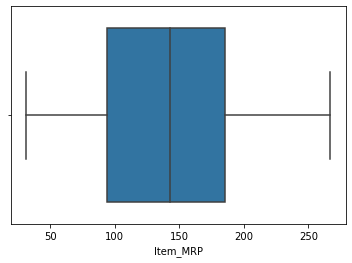

In [35]:
sns.boxplot(x="Item_MRP", data = df)

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

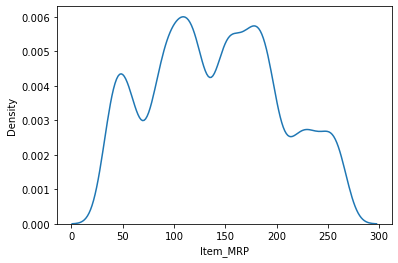

In [36]:
# Plotting a kdeplot to view the distribution of Item_MRP
sns.kdeplot(x="Item_MRP", data = df)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

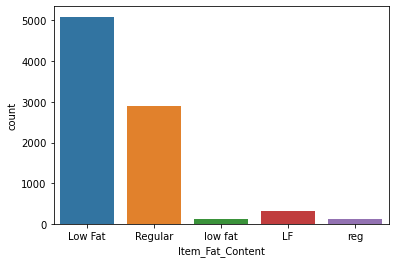

In [37]:
sns.countplot(x="Item_Fat_Content", data = df)

__Inference__
- The column has extra values for the same types of fat content. So, we have to replace it

In [38]:
# Replacing LF, low fat and reg with Low Fat and Regular respectively.
df.replace('low fat','Low Fat',inplace =True)
df.replace('LF','Low Fat',inplace =True)
df.replace('reg','Regular',inplace =True)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

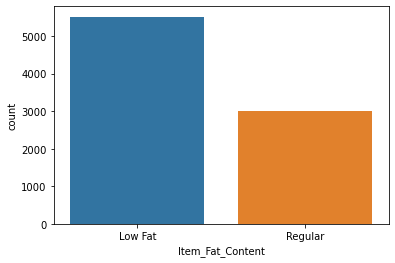

In [39]:
# Plotting the graph after replacement
sns.countplot(x="Item_Fat_Content", data = df)

In [40]:
df2.replace('low fat','Low Fat',inplace =True)
df2.replace('LF','Low Fat',inplace =True)
df2.replace('reg','Regular',inplace =True)

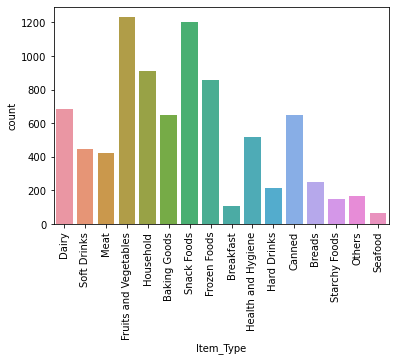

In [41]:
# Plotting the different values in the Item_Type column based on their count
plot=sns.countplot(data=df,  x="Item_Type")
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

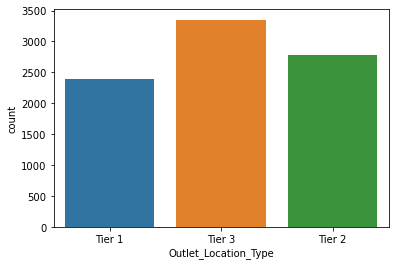

In [42]:
# Plotting the countplot of Outlet_Location_Type
sns.countplot(x="Outlet_Location_Type", data = df)

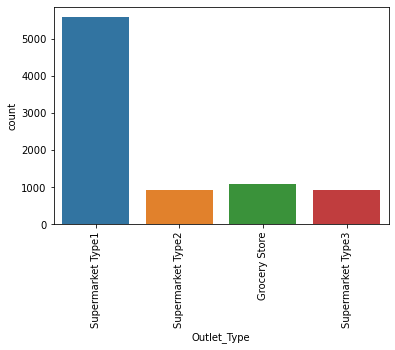

In [43]:
# Plotting the countplot of Outlet_Type
plot2=sns.countplot(data=df,  x="Outlet_Type")
plt.setp(plot2.get_xticklabels(), rotation=90)
plt.show()

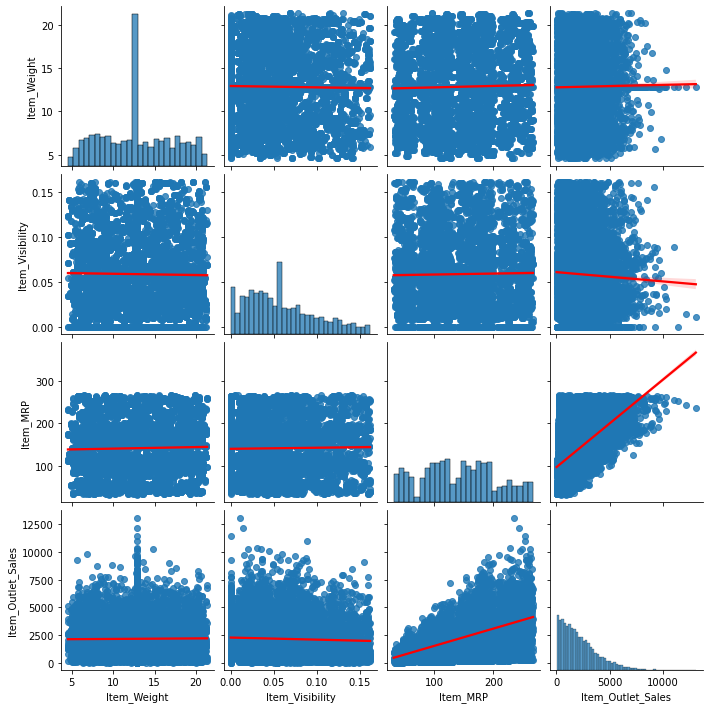

In [44]:
# Creating an object to store all the numerical columns in the df dataframe
data1 = {
    'Item_Weight': df['Item_Weight'],
    'Item_Visibility': df['Item_Visibility'],
    'Item_MRP': df['Item_MRP'],
    'Item_Outlet_Sales': df['Item_Outlet_Sales']
}
# Converting the object into a dataframe
req_columns = pd.DataFrame(data1)

# Creating the pairplot of all the numerical columns in the df dataset
sns.pairplot(data=req_columns, kind='reg',plot_kws={'line_kws': {'color': 'red'}})
plt.show()

__Inference__

- Item_Weight has no relationship with Item_Outlet_Sales ( Null hypothesis failed to be rejected)
- Item_Visibility has no relationship with Item_Outlet_Sales (Null hypothesis failed to be rejected)
- Item_MRP has positive linear relationship with Item_Outlet_Sales (Null hypothesis rejected)


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

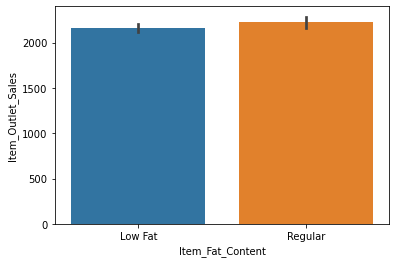

In [45]:
# Creating a barplot for Item_Fat_Content based on Item_Outlet_Sales
sns.barplot(x="Item_Fat_Content",y ="Item_Outlet_Sales", data = df)

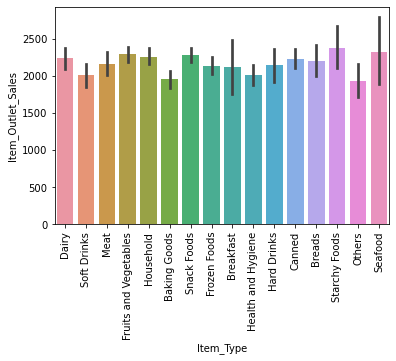

In [46]:
# Creating a barplot for different Item_Type based on Item_Outlet_Sales
sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data = df)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

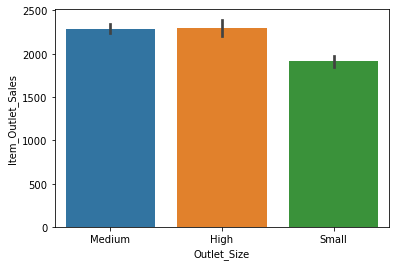

In [47]:
# Creating a barplot for Outlet_Size based on Item_Outlet_Sales
sns.barplot(x="Outlet_Size", y="Item_Outlet_Sales",data =df)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

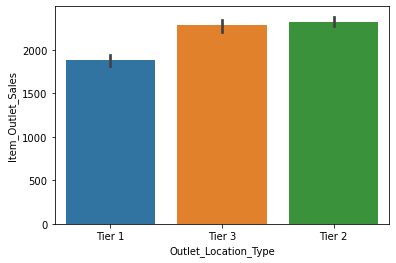

In [48]:
# Creating a barplot for Outlet_Location_Type based on Item_Outlet_Sales
sns.barplot(x="Outlet_Location_Type", y="Item_Outlet_Sales",data =df)

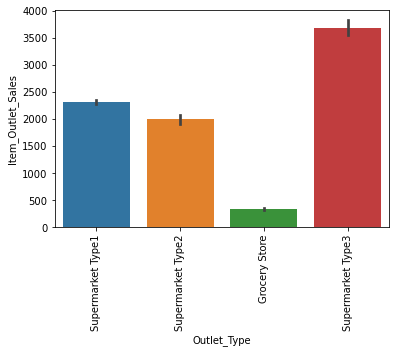

In [49]:
# Creating a barplot for Outlet_Type based on Item_Outlet_Sales
sns.barplot(x="Outlet_Type", y="Item_Outlet_Sales",data =df)
plt.xticks(rotation=90)
plt.show()

### Correlation Matrix

                   Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales
Item_Weight           1.000000        -0.014828  0.024756           0.011550
Item_Visibility      -0.014828         1.000000  0.016416          -0.044021
Item_MRP              0.024756         0.016416  1.000000           0.567574
Item_Outlet_Sales     0.011550        -0.044021  0.567574           1.000000


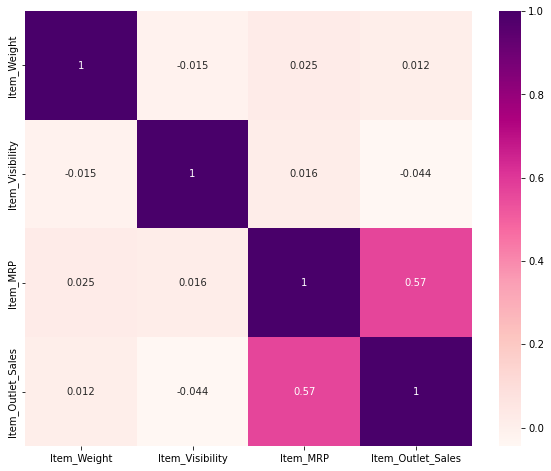

In [50]:
plt.figure(figsize=(10, 8)) 
corr_matrix = df.corr()
print(corr_matrix)

sns.heatmap(corr_matrix, cmap='RdPu', annot=True)

plt.show()

### Feature Engineering
#### Label Encoding
Changing categorical values into numerical values

In [51]:
# Importing the necessary libraries
from sklearn.preprocessing import LabelEncoder

In [52]:
# Creating a Label Encoder object
le = LabelEncoder()

In [53]:
# Creating a list called Labels and storing the features that has to be label encoded in it.
Labels = ['Outlet_Location_Type','Item_Fat_Content','Outlet_Size']

# Iterating through the list and transforming the features
for i in Labels:
    df[i] = le.fit_transform(df[i])

#### One-hot encoding

In [54]:
# Using pandas get_dummies to perform one-hot encoding and dropping the first value for getting n-1 features
df = pd.get_dummies(df, drop_first= True)

In [55]:
# Data after feature engineering
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,0,0,0,...,1,0,0,0,0,0,0,1,0,0


## x-y split

In [56]:
# Creating an object X with all the independent variables only
X = df.drop("Item_Outlet_Sales",axis=1)

In [57]:
# Creating an object y with the dependent variable
y = df['Item_Outlet_Sales']

In [58]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,0,2,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [59]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

## Hypothesis Testing

In [60]:
import statsmodels.api as sm

In [61]:
X_cons = sm.add_constant(X)

In [62]:
linear_model = sm.OLS(y,X_cons).fit()

In [63]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     455.6
Date:                Thu, 07 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:30:47   Log-Likelihood:                -71998.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8498   BIC:                         1.442e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -1875.0428     97.691    -19.194      0.000   -2066.541   -1683.545
Item_Weight                        -0.3834      2.917     -0.131      0.895      -6.102       5.335
Item_Fat_Content                   41.4116     28.262      1.465      0.143     -13.988      96.811
Item_Visibility                  -484.4857    308.405     -1.571      0.116   -1089.035     120.063
Item_MRP                           15.5681      0.198     78.672      0.000      15.180      15.956
Outlet_Size                        31.2937     28.727      1.089      0.276     -25.019      87.606
Outlet_Location_Type               12.8146     25.399      0.505      0.614     -36.973      62.602
Item_Type_Breads                    4.1070     84.112      0.049      0.961    -160.773     168.987
Item_Type_Breakfast                15.6825    116.793      0.134      0.893    -213.260     244.625
Item_Type_Canned                   26.6019     62.824      0.423      0.672     -96.548     149.751
Item_Type_Dairy                   -38.7382     62.287     -0.622      0.534    -160.836      83.359
Item_Type_Frozen Foods            -23.9942     58.916     -0.407      0.684    -139.485      91.496
Item_Type_Fruits and Vegetables    30.0140     55.005      0.546      0.585     -77.810     137.837
Item_Type_Hard Drinks               0.9367     90.245      0.010      0.992    -175.966     177.840
Item_Type_Health and Hygiene       -9.9576     68.041     -0.146      0.884    -143.334     123.419
Item_Type_Household               -39.9972     59.982     -0.667      0.505    -157.576      77.581
Item_Type_Meat                      2.4485     70.698      0.035      0.972    -136.136     141.033
Item_Type_Others                  -24.6887     98.690     -0.250      0.802    -218.145     168.768
Item_Type_Seafood                 184.1897    148.136      1.243      0.214    -106.194     474.573
Item_Type_Snack Foods              -8.4611     55.291     -0.153      0.878    -116.844      99.922
Item_Type_Soft Drinks             -26.7598     70.233     -0.381      0.703    -164.434     110.914
Item_Type_Starchy Foods            26.2849    103.131      0.255      0.799    -175.878     228.447
Outlet_Type_Supermarket Type1    1968.5429     39.921     49.310      0.000    1890.287    2046.799
Outlet_Type_Supermarket Type2    1630.1151     53.904     30.241      0.000    1524.450    1735.780
Outlet_Type_Supermarket Type3    3357.0441     53.836     62.357      0.000    3251.512    3462.576
==============================================================================
Omnibus:                      961.678   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2299.381
Skew:                           0.667   Prob(J

__Inference__

- Null hypothesis is failed to be rejected for all the independent variables except:
    - Item_MRP - Price of the item is highly correlated with the Sales amount ( P < 0.05 )
    - Supermarket Type1, Type2 and Type3 are also highly correlated with the Item_Outlet_Sales. ( P < 0.05 )

### Test Train Split

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
# Performing test train split with train:test = 80:20
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [66]:
# Viewing the number of columns and rows in train and test data
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(6818, 24) (1705, 24) (6818,) (1705,)


# Standardizing the data

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
# Creating a scaling object
scaler = StandardScaler()

In [69]:
# Creating a scaler object for train data
X_train_std = scaler.fit_transform(X_train)

In [70]:
# Creating a scaler object for test data
X_test_std = scaler.fit_transform(X_test)

# Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
# Creating a linear regression model
lr_model = LinearRegression()

In [73]:
# Fitting the train data into the model
lr_model.fit(X_train_std,y_train)

LinearRegression()

In [74]:
# Making predictions on the test set
y_pred = lr_model.predict(X_test_std)

In [75]:
# Viewing the predicted values
y_pred

array([ 2526.73339807,  2457.19218523,  2099.20395241, ...,
        4280.08573183, -1058.96908357,  5375.71112883])

### Evaluating model performance

In [76]:
# Model's accuracy score on test set
lr_test_score = lr_model.score(X_test_std,y_test)
lr_test_score

0.5624974047950205

In [77]:
# Model's accuracy score on train set
lr_train_score = lr_model.score(X_train_std,y_train)
lr_train_score

0.5625417407788773

In [78]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [79]:
# Model's coefficient of determination
lr_r2 = r2_score(y_test,y_pred)
lr_r2

0.5624974047950205

In [80]:
# Model's mean absolute error
lr_mae =  mean_absolute_error(y_test,y_pred)
lr_mae

847.2870432994222

In [81]:
# Model's mean squared error
lr_mse = np.sqrt(mean_squared_error(y_test,y_pred))
lr_mse

1131.5956019795328

# Regularized linear regression

In [82]:
from sklearn.linear_model import Ridge, Lasso

In [83]:
#Creating a ridge regression model with lambda value = 0.02
ridge_reg = Ridge(alpha = 0.02,max_iter = 100, tol = 0.1)

In [84]:
# Fitting train data into the model
ridge_reg.fit(X_train_std,y_train)

Ridge(alpha=0.02, max_iter=100, tol=0.1)

In [85]:
# Making predictions on the test data
ridge_reg_pred = ridge_reg.predict(X_test_std)
ridge_reg_pred

array([ 2526.73022233,  2457.18843597,  2099.20334815, ...,
        4280.08244728, -1058.94553686,  5375.69855923])

### Evaluating model performance

In [86]:
# Model's accuracy score on the train data
ridge_train_score = ridge_reg.score(X_train_std,y_train)
ridge_train_score

0.5625417407498707

In [87]:
# Model's accuracy score on the test data
ridge_test_score = ridge_reg.score(X_test_std,y_test)
ridge_test_score

0.5624973338144572

In [88]:
# Model's coefficient of determination
ridge_r2 = r2_score(y_test,ridge_reg_pred)
ridge_r2

0.5624973338144572

In [89]:
# Model's mean squared error
ridge_mse = np.sqrt(mean_squared_error(y_test,ridge_reg_pred))
ridge_mse

1131.5956937747483

In [90]:
# Model's mean absolute error
ridge_mae = mean_absolute_error(y_test,ridge_reg_pred)
ridge_mae

847.2869468198325

# Lasso Regression

In [91]:
# Creating a lasso model with lambda value = 0.3
lar = Lasso(alpha = 0.3) 
lar.fit(X_train_std,y_train)  

Lasso(alpha=0.3)

In [92]:
lar_pred = lar.predict(X_test_std)
lar_pred

array([ 2528.43526248,  2457.83434511,  2100.49421942, ...,
        4277.32813206, -1054.54201007,  5375.08215442])

### Evaluating model performance

In [93]:
# Model's accuracy score on the train data
la_train_score = lar.score(X_train_std, y_train)
la_train_score

0.562538686607791

In [94]:
# Model's accuracy score on the test data
la_test_score = lar.score(X_test_std, y_test)
la_test_score

0.5625846479952312

In [95]:
# Model's coefficient of determination
la_r2 = r2_score(y_test,lar.predict(X_test_std))
la_r2

0.5625846479952312

In [96]:
# Model's mean absolute error
la_mae = mean_absolute_error(y_test,lar.predict(X_test_std))
la_mae

847.1624569559369

In [97]:
# Model's mean squared error
la_mse = np.sqrt(mean_squared_error(y_test,lar.predict(X_test_std)))
la_mse

1131.4827695701726

# Random Forest Regressor

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
# Creating a random forest regressor model with n_estimators = 100
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0) 

rf_reg.fit(X_train_std, y_train) # fitting the train data into the model

rf_reg_pred = rf_reg.predict(X_test_std) # making predictions on the test set

rf_reg_pred


array([2762.790364, 1414.831658, 1976.300798, ..., 4624.300584,
        102.613096, 5264.187648])

### Evaluating model performance

In [100]:
# Model's accuracy score on the train set 
rf_train_score = rf_reg.score(X_train_std,y_train)
rf_train_score

0.9362168399169138

In [101]:
# Model's accuracy score on the test set
rf_test_score = rf_reg.score(X_test_std,y_test)
rf_test_score

0.5480285205451649

In [102]:
# Model's coefficient of determination
rf_r2 = r2_score(y_test,rf_reg_pred)
rf_r2

0.5480285205451649

In [103]:
# Model's mean squared error
rf_mse = np.sqrt(mean_squared_error(y_test,rf_reg_pred))
rf_mse

1150.1552056388803

In [104]:
# Model's mean absolute error
rf_mae = mean_absolute_error(y_test,rf_reg_pred)
rf_mae

817.7269768422287

### Hyperparameter tuning using Gridsearch

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [106]:
# Creating a random forest regressor model as a base estimator for grid search
rf_reg_model = RandomForestRegressor()

In [107]:
# Defining different parameters
n_estimators = [10,100,1000]
max_depth = range(1,31)
min_samples_leaf = np.linspace(0.1,1.0)
max_features = ["auto","sqrt","log2"]
min_samples_split = np.linspace(0.1, 1.0, 10)

In [108]:
# Creating a grid search object and performing grid search
grid_search = dict(n_estimators = n_estimators)
grid_search_process = GridSearchCV(estimator = rf_reg_model, param_grid = grid_search,n_jobs = -1, scoring ='r2', error_score = 0,verbose = 2,cv= 2)

In [109]:
# Fitting the train set on the model
grid_search_process.fit(X_train_std,y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=2, error_score=0, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [10, 100, 1000]}, scoring='r2',
             verbose=2)

In [110]:
# printing the best estimator
grid_search_process.best_estimator_

RandomForestRegressor(n_estimators=1000)

In [111]:
# printing the best score
grid_search_process.best_score_

0.5438210529613698

In [112]:
rf_best_pred = grid_search_process.predict(X_test_std)
rf_best_pred

array([2628.7228786, 1382.4631252, 2049.8743612, ..., 4599.1047146,
        107.703137 , 5219.6216592])

In [113]:
# printing the best parameters
grid_search_process.best_params_

{'n_estimators': 1000}

### Evaluating model performance

In [114]:
# Model's coefficient of determination
rf_best_r2 = r2_score(y_test,grid_search_process.predict(X_test_std))
rf_best_r2

0.5536257835356048

In [115]:
# Model's mean absolute error
rf_best_mae = mean_absolute_error(y_test,grid_search_process.predict(X_test_std))
rf_best_mae

811.7287621885632

In [116]:
# Model's mean squared error
rf_best_mse = np.sqrt(mean_squared_error(y_test,grid_search_process.predict(X_test_std)))
rf_best_mse

1143.0111963426225

In [117]:
# Model's accuracy score on test data
rf_best_test_score = grid_search_process.score(X_test_std,y_test)
rf_best_test_score

0.5536257835356048

In [118]:
# Model's accuracy score on train data
rf_best_train_score = grid_search_process.score(X_train_std,y_train)
rf_best_train_score

0.9379239233416328

# XGB Regressor

In [119]:
import xgboost as xgb

In [120]:
# creating a XG Boost Regressor model
xgb_reg = xgb.XGBRegressor(max_depth=5, n_estimators=100, learning_rate=0.2,
                            n_jobs=-1)

In [121]:
xgb_reg.fit(X_train_std, y_train) # fitting the train data into the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [122]:
xgb_reg_pred = xgb_reg.predict(X_test_std) # making predictions on the test set
xgb_reg_pred

array([2556.8667 , 2270.603  , 2442.8113 , ..., 5441.63   ,  164.10199,
       5329.1523 ], dtype=float32)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

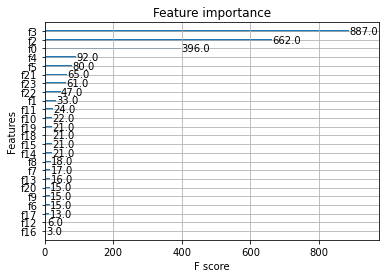

In [123]:
xgb.plot_importance(xgb_reg) # plotting feature importance graph

### Evaluating model performance

In [124]:
# Model's accuracy score on train data 
xgb_train_score = xgb_reg.score(X_train_std,y_train)
xgb_train_score

0.7582661018097515

In [125]:
# Model's accuracy score on test data
xgb_test_score = xgb_reg.score(X_test_std,y_test)
xgb_test_score

0.55567134763808

In [126]:
# Model's mean squared error
xgb_mse = np.sqrt(mean_squared_error(y_test,xgb_reg_pred))
xgb_mse

1140.3891951149246

In [127]:
# Model's coefficient of determination
xgb_r2 = r2_score(y_test,xgb_reg_pred)
xgb_r2

0.55567134763808

In [128]:
# Model's mean absolute error
xgb_mae = mean_absolute_error(y_test,xgb_reg_pred)
xgb_mae

805.7153624793174

### Hyperparameter tuning using GridSearchCV

In [129]:
# Creating a xgb regressor model as a base estimator for gridsearch
xgb_reg_best = xgb.XGBRegressor(random_state=42)

In [130]:
# Defining a dictionary of hyperparameter values
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}


In [131]:
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_reg_best, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [132]:
# Fitting train data on the model
grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=4

In [133]:
# Printing the best parameters and best estimators
best_params = grid_search.best_params_
best_params

best_estimator = grid_search.best_estimator_
best_estimator

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [134]:
# Making predictions using the best estimator
xgb_best_pred = grid_search.predict(X_test_std)
xgb_best_pred

array([2420.4617 , 1755.7189 , 2092.7063 , ..., 4400.53   , -224.29175,
       6157.27   ], dtype=float32)

### Evaluating model performance

In [135]:
# Model's accuracy score on train data
xgb_best_train_score = best_estimator.score(X_train_std,y_train)
xgb_best_train_score

0.6313734084766273

In [136]:
# Model's accuracy score on test data
xgb_best_test_score = best_estimator.score(X_test_std,y_test)
xgb_best_test_score

0.5883078799347272

In [137]:
xgb_best_r2 = r2_score(y_test,y_pred)
xgb_best_r2

0.5624974047950205

In [138]:
# Model's mean squared error
xgb_best_mse = np.sqrt(mean_squared_error(y_test, y_pred))
xgb_best_mse

1131.5956019795328

In [139]:
# Model's mean absolute error
xgb_best_mae = mean_absolute_error(y_test,y_pred)
xgb_best_mae

847.2870432994222

## Summary

In [140]:
R2 = [lr_r2,ridge_r2,la_r2,rf_r2,rf_best_r2,xgb_r2,xgb_best_r2]

In [141]:
MAE = [lr_mae, ridge_mae, la_mae, rf_mae, rf_best_mae,xgb_mae,xgb_best_mae]

In [142]:
MSE = [lr_mse, ridge_mse, la_mse, rf_mse,rf_best_mse,xgb_mse,xgb_best_mse]

In [143]:
SCORES_TRAIN = [lr_train_score,ridge_train_score, la_train_score, rf_train_score, rf_best_train_score,xgb_train_score,xgb_best_train_score]

In [144]:
SCORES_TEST = [lr_test_score, ridge_test_score, la_test_score, rf_test_score, rf_best_test_score,xgb_test_score
              , xgb_best_test_score]

In [145]:
Model_names = pd.DataFrame({
    'Models': ["Linear Regression","Ridge Regressor", "Lasso Regressor","Random Forest Regressor",
               "Random Forest Regressor after hyperparameter tuning", "XGB Regressor", "XGB Regressor after hyperparameter tuning"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R2, 'Scores on Train Data':SCORES_TRAIN,
     'Scores on Test Data':SCORES_TEST})
Model_names.sort_values(by='Scores on Test Data', ascending=False)

,Models,MAE,MSE,R^2,Scores on Train Data,Scores on Test Data
6,XGB Regressor after hyperparameter tuning,847.287043,1131.595602,0.562497,0.631373,0.588308
2,Lasso Regressor,847.162457,1131.482770,0.562585,0.562539,0.562585
0,Linear Regression,847.287043,1131.595602,0.562497,0.562542,0.562497
1,Ridge Regressor,847.286947,1131.595694,0.562497,0.562542,0.562497
5,XGB Regressor,805.715362,1140.389195,0.555671,0.758266,0.555671
4,Random Forest Regressor after hyperparameter t...,811.728762,1143.011196,0.553626,0.937924,0.553626
3,Random Forest Regressor,817.726977,1150.155206,0.548029,0.936217,0.548029


In [146]:
import pickle

In [147]:
filename1 = 'Sales_Prediction/Linear_Regression_Model'
filename2 = 'Sales_Prediction/Ridge_Regression_Model'
filename3 = 'Sales_Prediction/Lasso_Regression_Model'
filename4 = 'Sales_Prediction/RandomForest_Regression_Model'
filename5 = 'Sales_Prediction/XGB_Regression_Model'


In [148]:
pickle.dump(lr_model,open(filename1,'wb'))
pickle.dump(ridge_reg,open(filename2,'wb'))
pickle.dump(lar,open(filename3,'wb'))
pickle.dump(rf_reg,open(filename4,'wb'))
pickle.dump(xgb_reg,open(filename5,'wb'))


In [149]:
loaded_model1 = pickle.load(open(filename1,'rb'))
loaded_model1.predict(X_test_std)

array([ 2526.73339807,  2457.19218523,  2099.20395241, ...,
        4280.08573183, -1058.96908357,  5375.71112883])

In [150]:
loaded_model2 = pickle.load(open(filename2,'rb'))
loaded_model2.predict(X_test_std)

array([ 2526.73022233,  2457.18843597,  2099.20334815, ...,
        4280.08244728, -1058.94553686,  5375.69855923])

In [151]:
loaded_model3 = pickle.load(open(filename3,'rb'))
loaded_model3.predict(X_test_std)

array([ 2528.43526248,  2457.83434511,  2100.49421942, ...,
        4277.32813206, -1054.54201007,  5375.08215442])

In [152]:
loaded_model4 = pickle.load(open(filename4,'rb'))
loaded_model4.predict(X_test_std)

array([2762.790364, 1414.831658, 1976.300798, ..., 4624.300584,
        102.613096, 5264.187648])

In [153]:
loaded_model5 = pickle.load(open(filename5,'rb'))
loaded_model5.predict(X_test_std)

array([2556.8667 , 2270.603  , 2442.8113 , ..., 5441.63   ,  164.10199,
       5329.1523 ], dtype=float32)